## end-to-end model

- 종단 간 학습
- 학습을 통해 뽑힌 feature로 분류 등을 한다.
- 많은 데이터가 필요함.

</br>

## convolution과 전통적 nn
- flatten해도 부분적인 특성은 살아남긴 함
- feasibility testing : 내 아이디어 될지 안될지  -> 중요하지 않다(이미 옛날에 논문 증명)
- transitional imvariant : 특징이 사진 내부에 어디 있을지 모름
    - cor-realation 연산을 하면 2차원 특성을 뽑아낸다.
    - kernel이 다르면 특성을 못 뽑아낸다.
    - locally-connected
        - shared weight(특징 영역 추출) : sliding window하고 연산하면 위치와 관계없이 feature를 뽑을 수 있다
    - kernel을 여러 개  -> 정확도 상승

</br>
    
- 흰 바탕이면 색깔 반전해야!
- 학습을 통하면 filter를 통해 특징이 나오는데 이해는 못함 -> black-box model

---

#### locally-connected
- 가까운 pixel은 연관성이 있고 거리가 먼 pixel은 연관성이 없는 것으로 생각 

### Convolutional filter
- locally-conntected한 이미지 데이터 가정
    - 현재 pixel과 가로 세로 크기만큼 주변 pixel의 연관관계를 계산 
    - Kernel Filter를 sliding 하면서 연산
    - input의 위치와 관계없이, shared weight(특정 영역 추출)를 sliding window하고 그것을 연산하여, 똑같은 feature라면 위치와 상관없이 해당 feature를 뽑아낼 수 있음


- **Feature map**은 합성곱 계산으로 만들어진 행렬
- **Activation map** : Feature map 행렬에 활성 함수를 적용한 결과 , convolution 레이어의 최종 출력 결과
    
- Convolutional Layer:여러개의 Convolution Filter를 묶어놓은 것
    - 하나의 filter당 하나의 feature -> 여러개의 filter 사용
    - 기본적으로 weight처럼 convolutional filter는 서로 다른 랜덤 초기화 필터
    - 각 convolutional filter는 각각 연산해서 각각 6개의 output을 만들고 그 output은 새로운 feature로 쌓이는데 output feature임.
    - input_filter_size == convolutional filter의 filter_size
    - output_filter_size == convolutional layer의 filter개수
       
</br>

---

### Padding 
- sub sampling, conv 레이어의 출력 데이터의 사이즈를 조절
    - **zero-padding** :“0”값으로 둘러싸는 특징으로 부터 인공 신경망이 이미지의 외각을 인식
    - 특징 유실 막음
    - overfitting 방지 효과
    
---


### Pooling
- 데이터의 사이즈를 강제로 줄이는 개념 
- maxPooling은 Max한 값 챙기고 작은 값을 버림
    - 특징을 나타내는 픽셀은 많지 않아 중요한 pixel만 뽑기
    - 필요없는 feature를 버린다. ->  남은 메모리는 다음 Conv Layer를 쌓는데 쓰는, 연산
- 전체 데이타의 사이즈가 줄어들기 때문에 연산에 들어가는 컴퓨팅 리소스가 적음
- 데이타의 크기를 줄이면서 소실이 발생하기 때문에, 오버피팅을 방지
- 학습대상 파라미터가 없음
- Pooling 레이어를 통과하면 행렬의 크기 감소 & 채널 수 무변


#### Max Pooling

- **실용적으로 많이 안쓰려고 하는 추세**
- CNN의 Layer는 앞쪽일수록 저차원의 linear한 feature를 뽑아내고, 뒤로 갈수록 고차원의 feature를 뽑아냄 (hierarchy 특성)
    
    

<br>

> cherry picking
     - ML의 분류 강화학습은 체리, 비지도학습은 빵
     - NFL 임에 불구하고 모델 돌리고 나서 좋은 결과만 보여주는 것

### 최적의 모델 
- 하이퍼파라미터 튜징 GridSearchCV, keras-tuner로 자동으로 찾음
- 기준 모델만들고 Learning curve 보고 결정

</br>

---

- numpy는 gpu x, mutable
- tensor는
    - gpu 지원, immutable, functional api, autograd(자동 미분)

In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() 

x_train = x_train.reshape((-1, 28, 28, 1))  
x_test = x_test.reshape((-1, 28, 28, 1))

x_train, x_test = x_train / 255.0, x_test/ 255.0

In [3]:
tf.keras.layers.Conv2D is tf.keras.layers.Convolution2D

True

#### Convolution1D
- 자연어처리, 신호처리

### Convolution2D

- input (세로, 가로, 채널) tensor
- arg : filter, kernel size, strides, padding(valid,same), activation, use_bias, kernel initializer, regularizer, constraint(값 범위)
- Conv : feature extraction
    - Dense : classification
    
#### Maxpool2D
- 피라미드 형태로 노드 늘리기 -> 특징 추출 좋음

In [5]:
model=tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation ='relu'),
    tf.keras.layers.Dense(10, activation ='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [6]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

# 전처리 잘 되어있어 정확도 높은 편

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1459 - accuracy: 0.9558
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0461 - accuracy: 0.9859
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0314 - accuracy: 0.9901
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0234 - accuracy: 0.9927
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0175 - accuracy: 0.9947


## color image(cifar10)

- 3 channels
- mnist와 개수 비슷

https://www.tensorflow.org/tutorials/images/cnn

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() #holdout

#  0~1 사이로 정규화
x_train, x_test = x_train / 255.0, x_test/ 255.0

170500096/170498071 [==============================] - 87s 1us/step


In [8]:
x_train.shape

(50000, 32, 32, 3)

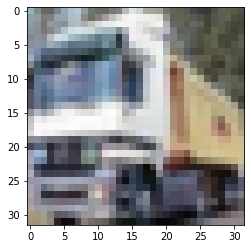

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1]) 

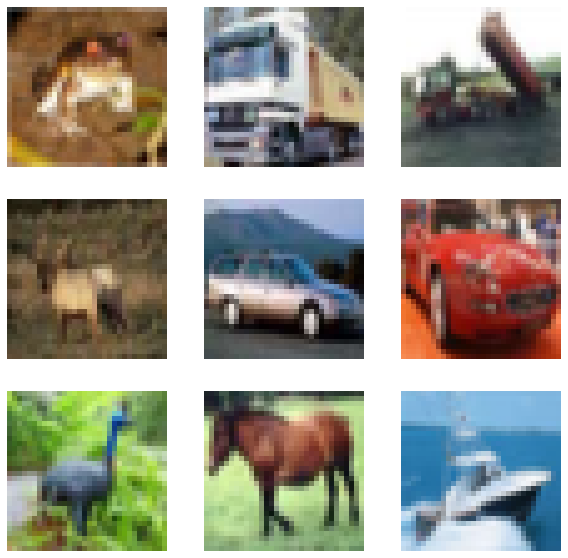

In [10]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.axis("off")

In [11]:
model=tf.keras.models.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),     
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation ='relu'),
    tf.keras.layers.Dense(10, activation ='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                147520    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4653 - accuracy: 0.4723
Epoch 2/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1247 - accuracy: 0.6043
Epoch 3/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9944 - accuracy: 0.6528
Epoch 4/5
1563/1563 [==============================] - 21s 14ms/step - loss: 0.9101 - accuracy: 0.6838
Epoch 5/5
1563/1563 [==============================] - 21s 14ms/step - loss: 0.8468 - accuracy: 0.7064


### 성능 향상
1. convolution layer 늘리기
2. epoch 늘리기
3. validation 나누고 결과 보기

In [13]:
model=tf.keras.models.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),    
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation ='relu'),
    tf.keras.layers.Dense(10, activation ='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [14]:
history=model.fit(x_train, y_train, epochs=15, validation_split=0.2) 

Epoch 1/15
1250/1250 [==============================] - 22s 17ms/step - loss: 1.6444 - accuracy: 0.3965 - val_loss: 1.3929 - val_accuracy: 0.5001
Epoch 2/15
1250/1250 [==============================] - 21s 17ms/step - loss: 1.2707 - accuracy: 0.5438 - val_loss: 1.2564 - val_accuracy: 0.5568
Epoch 3/15
1250/1250 [==============================] - 21s 17ms/step - loss: 1.1240 - accuracy: 0.5990 - val_loss: 1.1144 - val_accuracy: 0.6121
Epoch 4/15
1250/1250 [==============================] - 21s 17ms/step - loss: 1.0373 - accuracy: 0.6349 - val_loss: 1.1284 - val_accuracy: 0.6102
Epoch 5/15
1250/1250 [==============================] - 21s 17ms/step - loss: 0.9611 - accuracy: 0.6619 - val_loss: 0.9782 - val_accuracy: 0.6603
Epoch 6/15
1250/1250 [==============================] - 22s 17ms/step - loss: 0.9023 - accuracy: 0.6825 - val_loss: 1.0013 - val_accuracy: 0.6570
Epoch 7/15
1250/1250 [==============================] - 22s 17ms/step - loss: 0.8484 - accuracy: 0.7031 - val_loss: 0.9380 -

In [16]:
history.model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9142 - accuracy: 0.7046


[0.9141885042190552, 0.7045999765396118]

In [17]:
history.history

{'loss': [1.6444116830825806,
  1.270653247833252,
  1.1239935159683228,
  1.0372514724731445,
  0.9610756635665894,
  0.9023014903068542,
  0.8484243154525757,
  0.8046466112136841,
  0.7660514116287231,
  0.7316813468933105,
  0.7032983899116516,
  0.6716746687889099,
  0.6522400379180908,
  0.6228605508804321,
  0.5981391668319702],
 'accuracy': [0.3964749872684479,
  0.5438249707221985,
  0.599049985408783,
  0.6348749995231628,
  0.6619499921798706,
  0.6824749708175659,
  0.7030749917030334,
  0.7175750136375427,
  0.731374979019165,
  0.7424250245094299,
  0.75204998254776,
  0.7625250220298767,
  0.7695749998092651,
  0.7831249833106995,
  0.7889999747276306],
 'val_loss': [1.3929451704025269,
  1.2564146518707275,
  1.114414095878601,
  1.1284350156784058,
  0.978245198726654,
  1.001278281211853,
  0.9380078315734863,
  0.927544355392456,
  0.9003543257713318,
  0.8964080214500427,
  0.9089181423187256,
  0.8814799785614014,
  0.8667082190513611,
  0.9411881566047668,
  0.884

- loss, accuray 좋아졌지만 val loss는 과적합
    -> 일정 지점에서 자르고 다른 방법 찾기

<AxesSubplot:>

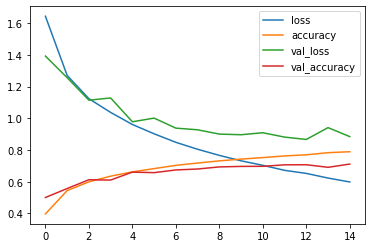

In [18]:
import pandas as pd
pd.DataFrame(history.history).plot.line()

# 한번에 학습해야 된다.

In [19]:
model=tf.keras.models.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),    
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation ='relu'),
    tf.keras.layers.Dense(10, activation ='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
hist=model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 23s 15ms/step - loss: 1.5778 - accuracy: 0.42170s - loss: 1.583
Epoch 2/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2141 - accuracy: 0.5688
Epoch 3/5
1563/1563 [==============================] - 24s 16ms/step - loss: 1.0643 - accuracy: 0.6265
Epoch 4/5
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9575 - accuracy: 0.6627
Epoch 5/5
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8838 - accuracy: 0.6906


In [22]:
hist=model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8246 - accuracy: 0.7114
Epoch 2/3
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7765 - accuracy: 0.7291
Epoch 3/3
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7346 - accuracy: 0.7428


In [24]:
pd.DataFrame(hist.history)
# 최근 학습한 거만 나옴

,loss,accuracy
0,0.824625,0.71144
1,0.776483,0.72910
2,0.734606,0.74278
